       OBJECTID    LATITUDE   LONGITUDE       EST_HHC   Shape__Area  \
count  566.0000  566.000000  566.000000    566.000000  5.660000e+02   
mean   283.5000  -29.861166   30.896194    525.971731  1.770229e+05   
std    163.5344    0.123218    0.099233    968.844647  4.949141e+05   
min      1.0000  -30.214260   30.585686      4.000000  1.195089e+02   
25%    142.2500  -29.958699   30.864047     56.250000  5.714704e+03   
50%    283.5000  -29.880677   30.897024    177.000000  2.194467e+04   
75%    424.7500  -29.785339   30.952246    608.250000  9.635537e+04   
max    566.0000  -29.525063   31.177438  10011.000000  6.560964e+06   

       Shape__Length  
count     566.000000  
mean     2347.667073  
std      2973.644491  
min        79.929137  
25%       521.062682  
50%      1168.496511  
75%      2891.325711  
max     22801.689196  


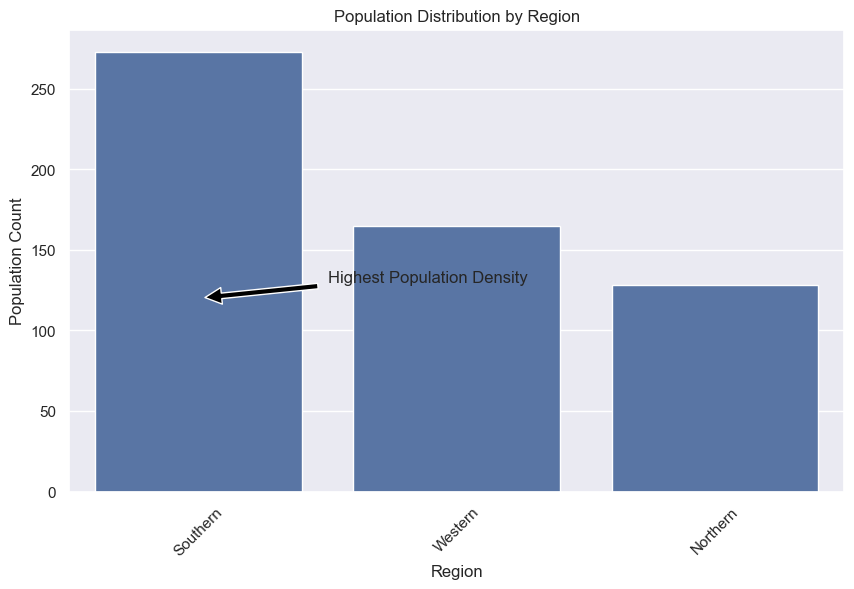

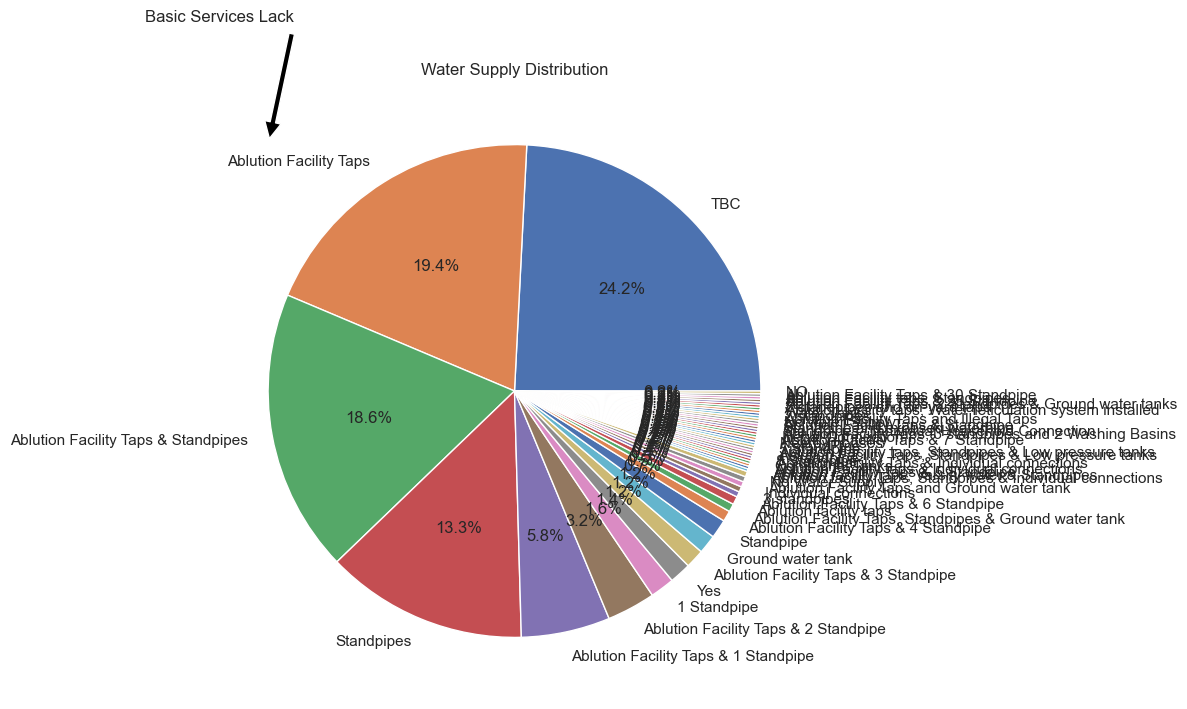

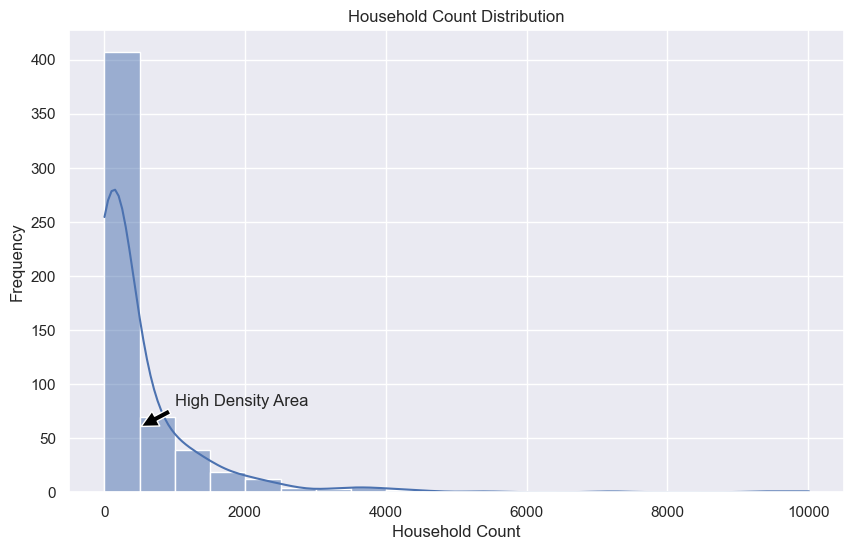

<Figure size 1000x600 with 0 Axes>

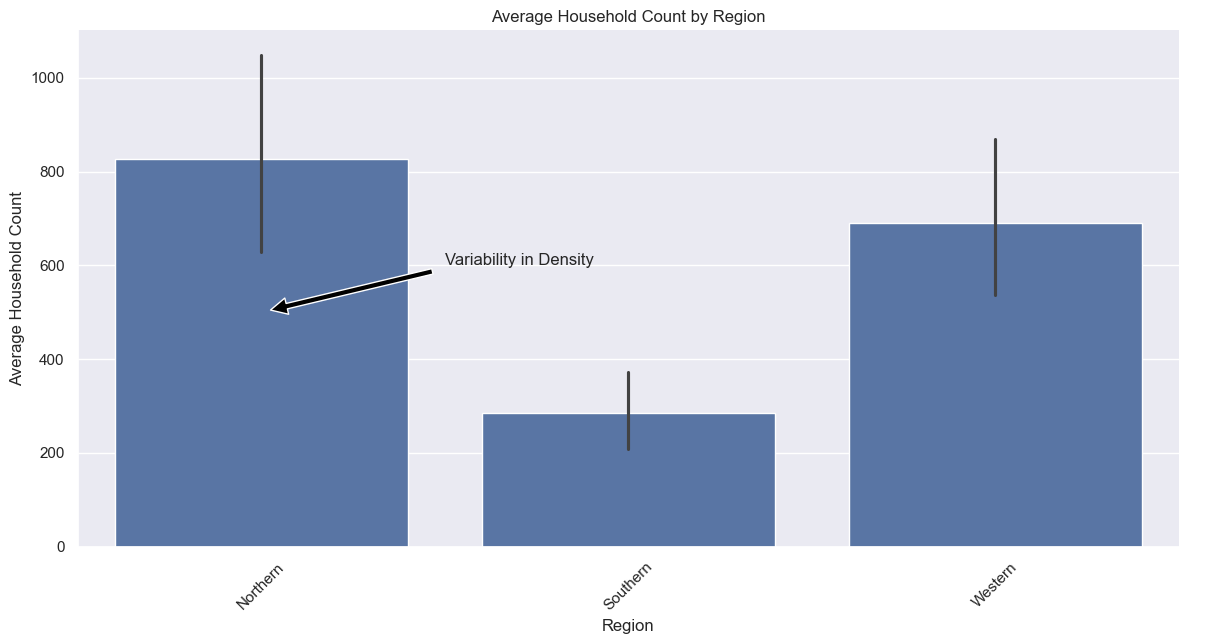

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


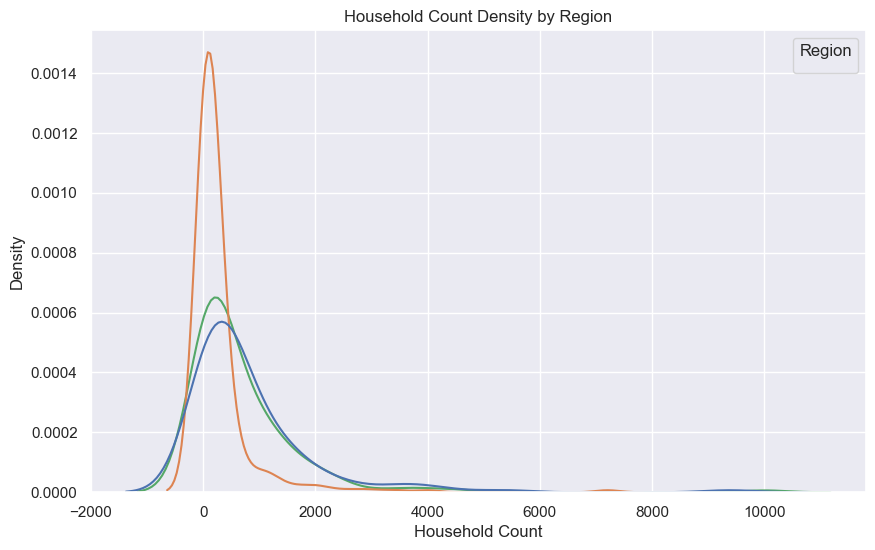

In [3]:
import pandas as pd
myDataset = pd.read_csv('C:/Users/Laptop C/Downloads/Informal_Settlement_Programme_-1898186875815614491.csv')

missing_data = myDataset.isnull().sum()


myDataset['ALT_NAME'] = myDataset['ALT_NAME'].fillna('Unknown')
missing_data2 = myDataset.isnull().sum()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

myDataset['LATITUDE'] = myDataset['LATITUDE'].str.replace(',', '.').astype(float)
myDataset['LONGITUDE'] = myDataset['LONGITUDE'].str.replace(',', '.').astype(float)
summary_stats = myDataset.describe()
print(summary_stats)

plt.figure(figsize=(10, 6))
sns.countplot(x='REGION', data=myDataset, order=myDataset['REGION'].value_counts().index)
plt.title('Population Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Population Count')
plt.xticks(rotation=45)
plt.annotate('Highest Population Density', xy=(0, 120), xytext=(0.5, 130),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

plt.figure(figsize=(8, 8))
myDataset['WATER_SUPP'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Water Supply Distribution')
plt.ylabel('')
plt.annotate('Basic Services Lack', xy=(-1, 1), xytext=(-1.5, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(myDataset['EST_HHC'], bins=20, kde=True)
plt.title('Household Count Distribution')
plt.xlabel('Household Count')
plt.ylabel('Frequency')
plt.annotate('High Density Area', xy=(500, 60), xytext=(1000, 80),
arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

plt.figure(figsize=(10, 6))
sns.catplot(x='REGION', y='EST_HHC', kind='bar', data=myDataset, height=6, aspect=2)
plt.title('Average Household Count by Region')
plt.xlabel('Region')
plt.ylabel('Average Household Count')
plt.xticks(rotation=45)
plt.annotate('Variability in Density', xy=(0, 500), xytext=(0.5, 600),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# Create a KDE plot for household counts by region
plt.figure(figsize=(10, 6))
sns.kdeplot(data=myDataset, x='EST_HHC', hue='REGION', common_norm=False)
plt.title('Household Count Density by Region')
plt.xlabel('Household Count')
plt.ylabel('Density')
plt.legend(title='Region')
plt.annotate('High Density Area', xy=(500, 0.002), xytext=(1000, 0.0025),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

